In [62]:
import pandas as pd 
import numpy as np 

import time
import matplotlib.pyplot as plt 
from sklearn.svm import LinearSVC
import seaborn as sns
color = sns.color_palette()
%matplotlib inline


In [63]:
# data set link 

# http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones 



# loaded one feature total acceleration in y direction
# like this total 9 features are there total acceleration in x, y,z direction 
# body acceleration in x, y ,z 
# body gyro in x,y ,z direction 


data = pd.read_csv( './DataSet/train/Inertial_signals/total_acc_y_train.txt', header=None, delim_whitespace=True)
data.shape

# the shape is 7352 rows and each row has 128 colunns 

(7352, 128)

In [64]:
# grouping all the features in one array where the features are separated in the 3rd dimension 




def load_data( prefix, file_name, suffix):
    values = list()
    for names in file_name:
        data=pd.read_csv( prefix+names+suffix, header=None, delim_whitespace=True)
        values.append(data)
    data = np.dstack( values)
    return data


In [65]:
# path and prefixes for the dataset 


prefix_train = './DataSet/train/Inertial_signals/'
prefix_test = './DataSet/test/Inertial Signals/'
body_acc = [ 'total_acc_x_','total_acc_y_','total_acc_z_']
body_gyro = [ 'body_gyro_x_','body_gyro_y_','body_gyro_z_']
total_acc = ['total_acc_x_','total_acc_y_','total_acc_z_']
total_files = body_acc + body_gyro+ total_acc

In [66]:
# loading the datset 


X_train = load_data(prefix_train, total_files,'train.txt')
y_train = pd.read_csv( './DataSet/train/y_train.txt', header=None, delim_whitespace=True).values
X_test = load_data( prefix_test, total_files,'test.txt')
y_test =  pd.read_csv( './DataSet/test/y_test.txt', header=None, delim_whitespace=True).values

In [67]:
# whole dataset loaded the shape is 7352 x 128 x 9  and the labels are 7352 x1 which are the activities 


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7352, 128, 9) (7352, 1) (2947, 128, 9) (2947, 1)


In [68]:
# Check whether the data is balanced or not plotting the count for each activity 

def plot_input_data( y_train):
    names = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
    values = np.bincount(y_train[:,0])
    values = values[1:]
    plt.figure(figsize=(16,8))
    sns.barplot(names, values, alpha=0.8, color=color[1])
    plt.ylabel('Activity Count  ', fontsize=16)
    plt.xlabel('(Activities)', fontsize=16)
    plt.title('Activities count', fontsize=18)
    plt.xticks(rotation='vertical')
    plt.show()
    
    
    
    
    


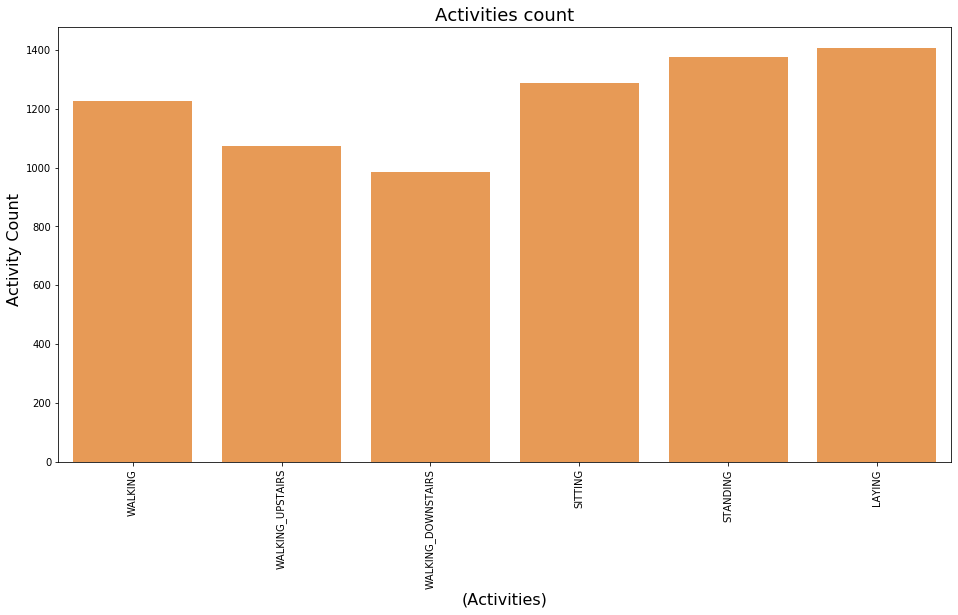

In [69]:
plot_input_data( y_train )

In [70]:
"""
plotting time series data for one subject plotting all the features and the activities how the signals vary

with the activity. subject_train.txt provides a mapping which subject performed which activity
"""




subjects = pd.read_csv('./DataSet/train/subject_train.txt', header=None, delim_whitespace=True).values

In [71]:
""" the shape is 7352 x 1  which is the mapping telling us which row belongs to which subject"""

print(subjects.shape)
train_subjects = np.unique( subjects)
train_subjects

(7352, 1)


array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [72]:
""" this function extracts all the data for one subject """


def data_for_one_subject(X_train, y_train, sub_list, subid):
    ix = [i for i in range(len(sub_list)) if sub_list[i] == subid]
    return X_train[ix,:,:], y_train[ix]

    

In [73]:
sub_X, sub_y = data_for_one_subject( X_train, y_train, subjects, 1)
print( sub_X.shape)    

(347, 128, 9)


In [74]:
""" remove overlapping between the continuous functions """

def remove_overlap( windows):
    series  = list()
    for x in windows:
        #print( x.shape)
        half = int( len( windows)/2) -1
        for value in x[-half:]:
            series.append(value)
    return series

In [75]:
"""Plotting all the 9 features for the first subject"""



def plot_data_for_one_subject( sub_X, sub_y):
    n_plots, off = sub_X.shape[2]+1, 0
    plt.figure( figsize=(15,15))
    #plot total_acc 
    for i in range(3):
        plt.subplot( n_plots, 1, off+1)
        plt.plot( remove_overlap( sub_X[:,:,off]),'b')
        plt.title('total acc '+str(i), y=0, loc='left')
        off+=1
    for i in range(3):
        plt.subplot( n_plots, 1, off+1)
        plt.plot( remove_overlap( sub_X[:,:,off]),'g')
        plt.title('body acc '+str(i), y=0, loc='left')
        off+=1
    for i in range(3):
        plt.subplot( n_plots, 1, off+1)
        plt.plot( remove_overlap( sub_X[:,:,off]),'r')
        plt.title('body gyro '+str(i), y=0, loc='left')
        off+=1
    plt.subplot( n_plots, 1, n_plots)
    plt.plot(sub_y,'c')
    plt.title('activity', y=0, loc='left')
    #plt.title('Features for one subject', fontsize=18)
    plt.show()
    
    
        
        

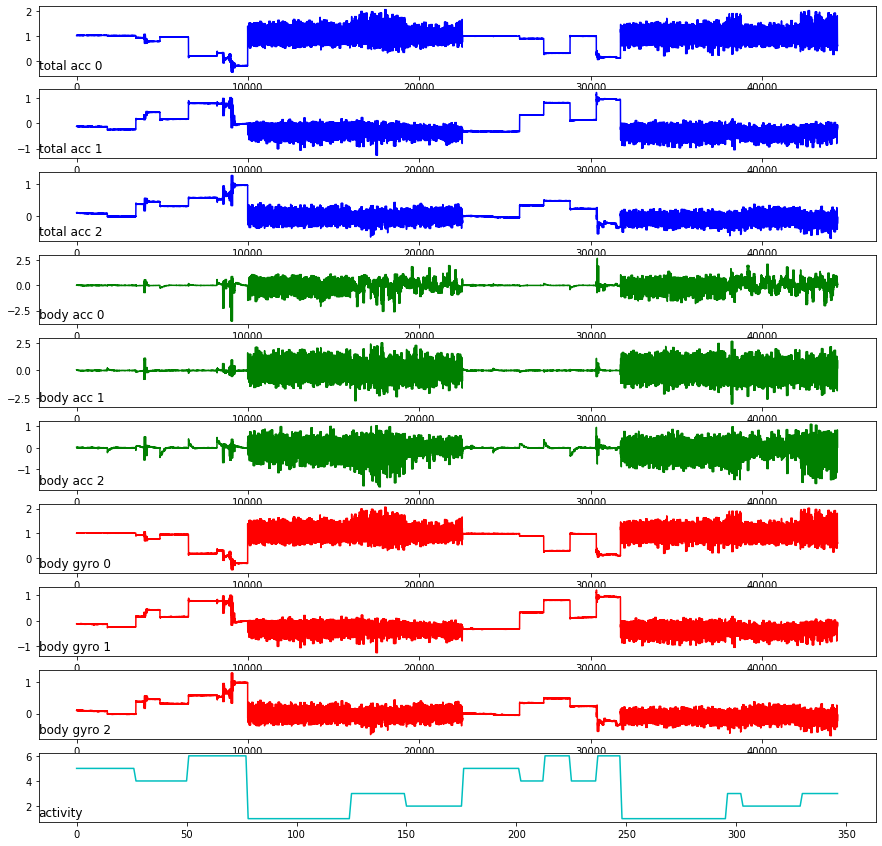

In [76]:
""" All the features plotted for one subject this helps in the data visualisation 0 means x, 1 y and 2 is z"""

plot_data_for_one_subject( sub_X, sub_y)